# CNN - Convolutional Neural Network
## Project on Dogs Vs Cats classification


## 1.Importing the needed libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Matplotlib is building the font cache; this may take a moment.


## 2. Define image properties
We would be using this img properties in the project to ensure consistency in the images

In [7]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3  # because of RGB, we are using colored images

## 3.Prepare dataset for training model:

In [8]:
filenames=os.listdir("./dogs-vs-cats/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

**Explanation**
- The folder from the dataset is under the folder _dogs-vs-cats/train_
- the files in this folder are named:
cat0, cat1, cat2, ....cat24499, dog0, dog1, dog3...dog24499.jpg
- then put them in array called _categories_ which will store value of _1_ for a _dog image_ else store _0_ for the _cat image_

## 4. Create the neural net model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

C:\Users\Ashraf Mohammed\Desktop\CNN-project\ml-venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Explanation
- conv2D -> is the convolutional layer- MaxPooling2D -> Pooling
- Dropout -> prevent neural networks from overfitting
- BatchNormalization -> to have values ranging only between 0 to 1(feature scaling)
- we need a minimum of 3 convolutional blocks, below we have 3 of them
- each layer starts with _model.add(Convo2D(...)).
- relu is to ensure we have +ve values only.
- Under input_shape we pass in the Image_Width and Image_Height, to ensure all images have same dimensions, and Image_Channels to ensure all are in RGB(colored image)
- and before pushing to the pooling layer we call: _BatchNormalization()_

- Pooling part
  - pool_size has to be a _square(equal dimensions)_
  - Then call The Dropout() to prevent overfitting, the value passed in DropOut() ranges between 0 to 1, is the fraction of the input data to be dropped.It is the odds/probability/chances of dropping a neuron, if one does not know of what value to use, then go fo for _0.5_ for the _hidden layer_ and _0.1_ for the _input layer_

- Flattening part
  - we flatten using the Flatten()
  - the rest of the steps are now similar to what we do in ANN

## 5. Analyzing model

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

## 6. Define callbacks and learning rate

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize EarlyStopping with patience of 10 epochs
earlystop = EarlyStopping(patience=10)

# Initialize ReduceLROnPlateau to reduce learning rate on plateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',   # Use 'val_accuracy' if you encounter warnings with 'val_acc'
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# Combine both callbacks into a list
callbacks = [earlystop, learning_rate_reduction]

Use 'val_accuracy' if you encounter warnings with 'val_acc' as it may have been renamed to val_accuracy in newer versions of _TensorFlow_

- **Callbacks** are used to perform various actions in between the phase of training.Callbacks API in keras can used to
  - Write TensorBoard logs after every batch of training to monitor your metrics
  - Periodically save your model to disk
  - Do early stopping
  - Get a view on internal states and statistics of a model during training

## 7. Manage data

In [12]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

## 8. Training and validation data generator

In [14]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./dogs-vs-cats/test/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\Ashraf Mohammed\Desktop\CNN-project\ml-venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


## 9. Model Training

In [16]:
epochs = 10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

Epoch 1/10


C:\Users\Ashraf Mohammed\Desktop\CNN-project\ml-venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 642s 478ms/step - accuracy: 0.5972 - loss: 0.9624 - val_accuracy: 0.6490 - val_loss: 0.6444 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Ashraf Mohammed\Desktop\CNN-project\ml-venv\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


   1/1333 ━━━━━━━━━━━━━━━━━━━━ 6:42 302ms/step - accuracy: 0.8667 - loss: 0.3944

C:\Users\Ashraf Mohammed\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8667 - loss: 0.3944 - val_accuracy: 0.6000 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 413s 310ms/step - accuracy: 0.6996 - loss: 0.5849 - val_accuracy: 0.7283 - val_loss: 0.6496 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - accuracy: 0.7333 - loss: 0.6134 - val_accuracy: 0.6000 - val_loss: 0.5750 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 412s 309ms/step - accuracy: 0.7509 - loss: 0.5133 - val_accuracy: 0.7746 - val_loss: 0.4735 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.8667 - loss: 0.3582 - val_accuracy: 1.0000 - val_loss: 0.2451 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 408s 306ms/step - accuracy: 0.7692 - loss: 0.4874 - val_accuracy: 0.7227 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 8/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.66

## 10. Save the model

In [17]:
model.save("model1_catsVSdogs_10epoch.h5")

## 11. Test data preparation

In [18]:
test_filenames = os.listdir("./dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

## 12. Make categorical prediction

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    "./dogs-vs-cats/test1/",
    x_col='filename',
    y_col=None,  # No labels in the test set
    target_size=Image_Size,
    class_mode=None,  # No labels
    batch_size=batch_size,
    shuffle=False
)


Found 12500 validated image filenames.


In [24]:
steps = int(np.ceil(nb_samples / batch_size))

In [25]:
predict = model.predict(test_generator, steps=steps)

C:\Users\Ashraf Mohammed\Desktop\CNN-project\ml-venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


834/834 ━━━━━━━━━━━━━━━━━━━━ 150s 179ms/step


## 13. Convert labels to categories

In [26]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_8792\3639850117.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


## 14. Visualize the prediction results

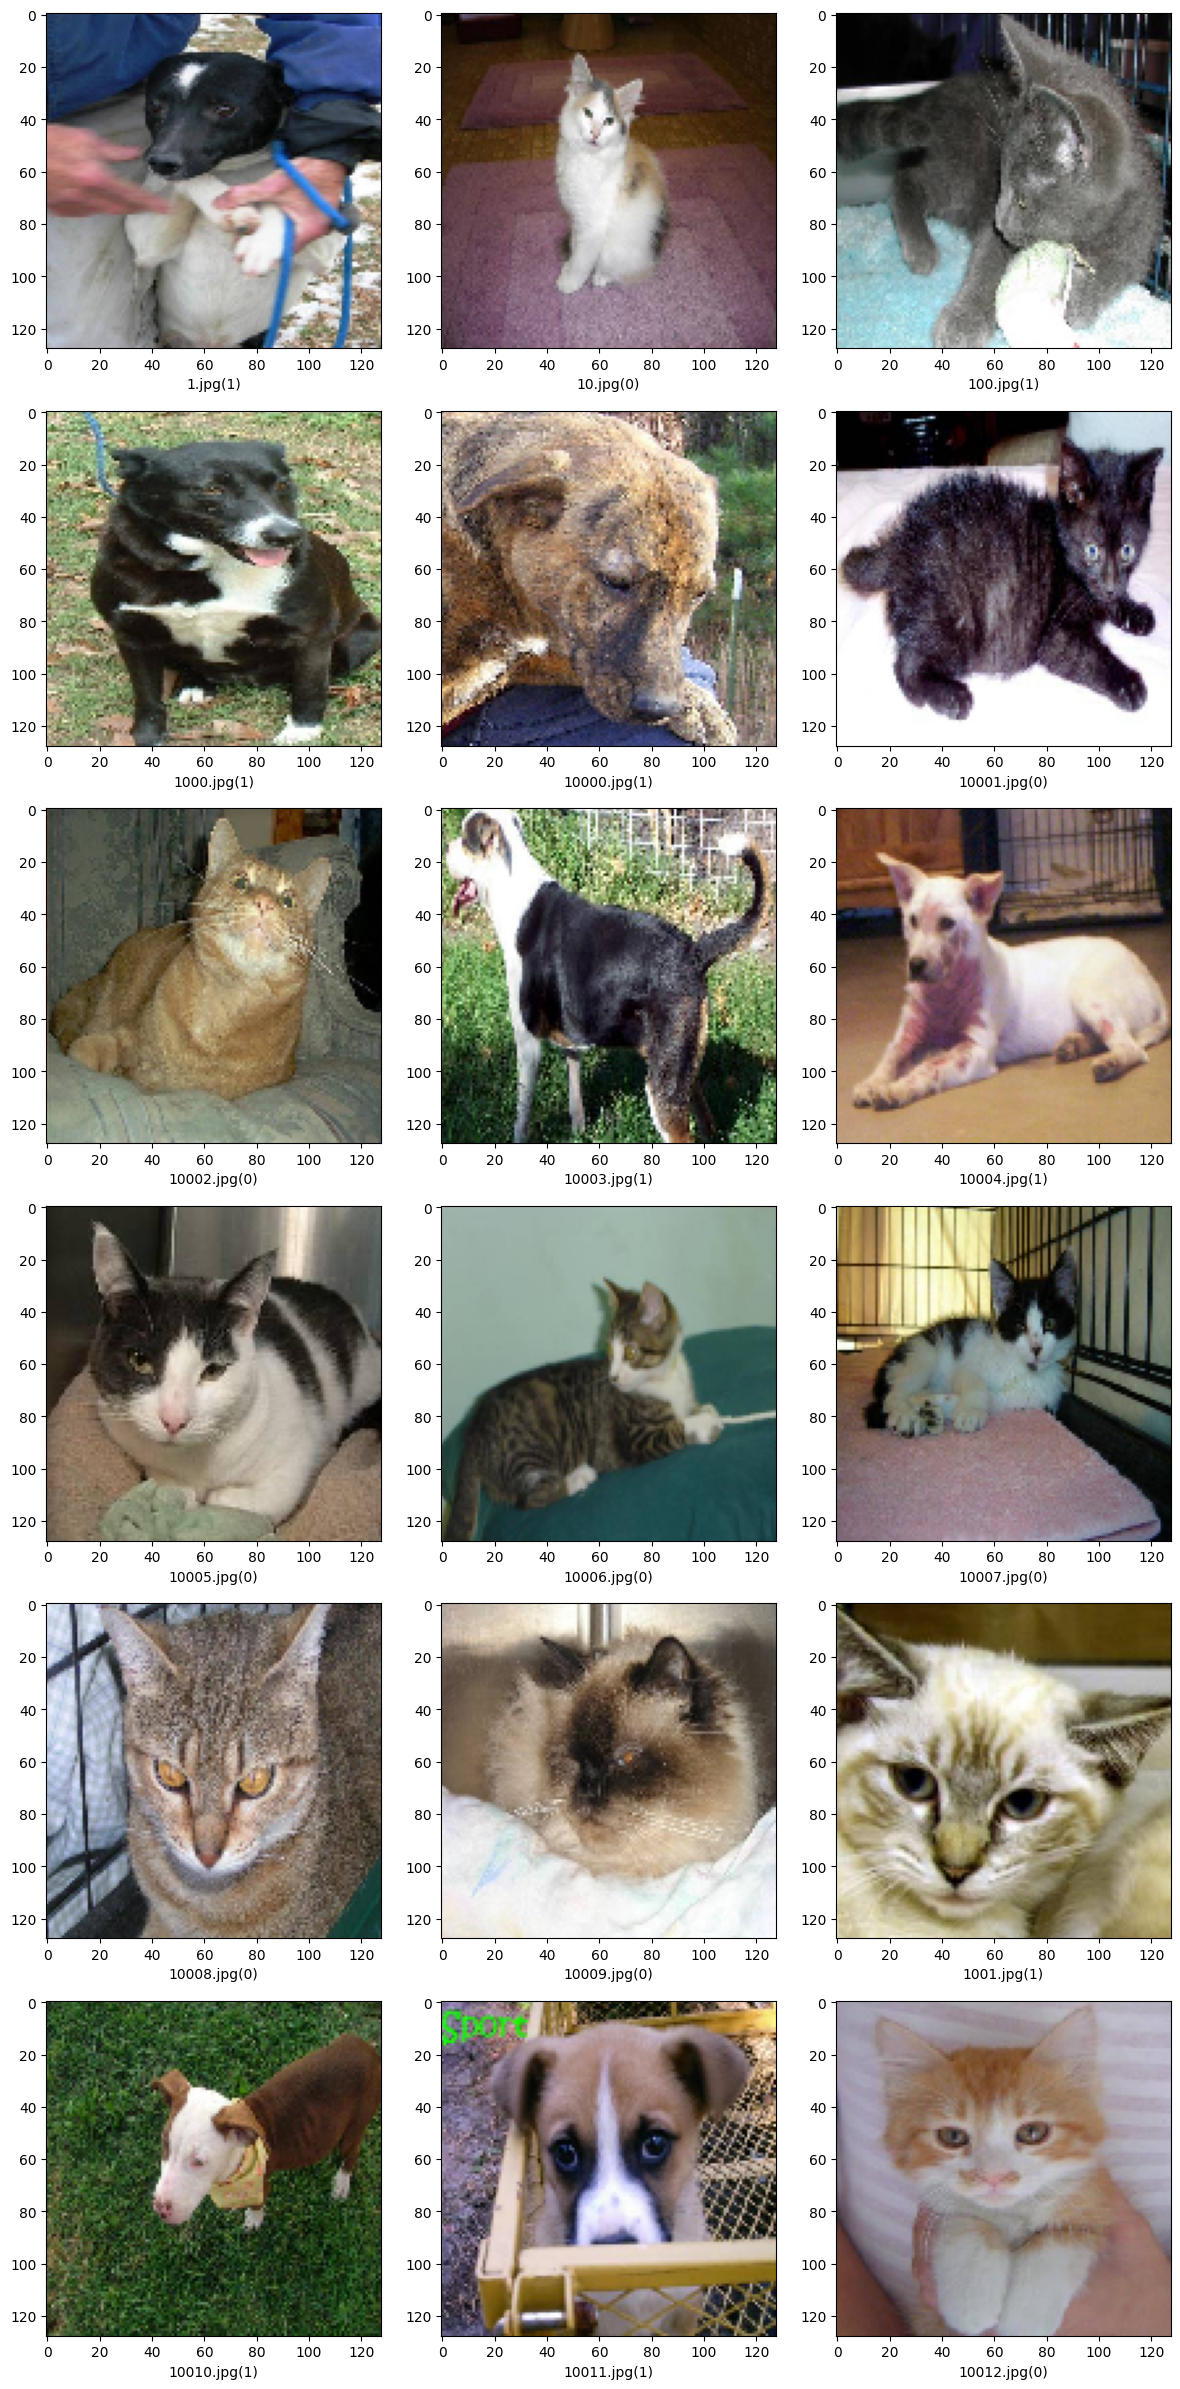

In [27]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

## 15. Testing the model performance on custom data

In [29]:
from PIL import Image

In [30]:
# Define the results dictionary
results = {
    0: 'cat',
    1: 'dog'
}

# Load and preprocess the image
im = Image.open("custom-dog.jpg")
im = im.resize(Image_Size)  # Resize to your model's input size
im = np.array(im)  # Convert to numpy array
im = im / 255.0  # Normalize the image
im = np.expand_dims(im, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(im)
pred = np.argmax(predictions[0])  # Get the class index
print(pred, results[pred])  # Print the predicted class and label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1 dog


the results are correct, as i used a random dog image from:

https://www.freepik.com/free-psd/cute-brown-white-dog-scene_38709003.htm#fromView=search&page=1&position=6&uuid=646a9842-1488-48e7-b201-28bbe177a670

and renamed it to **'custom-dog.jpg'**

and it said its actually a dog

In [31]:
# Define the results dictionary
results = {
    0: 'cat',
    1: 'dog'
}

# Load and preprocess the image
im = Image.open("custom-cat.jpg")
im = im.resize(Image_Size)  # Resize to your model's input size
im = np.array(im)  # Convert to numpy array
im = im / 255.0  # Normalize the image
im = np.expand_dims(im, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(im)
pred = np.argmax(predictions[0])  # Get the class index
print(pred, results[pred])  # Print the predicted class and label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 cat


the results are correct, as i used a random cat image from:

https://www.freepik.com/free-psd/beautiful-cat-portrait-isolated_38310697.htm#fromView=search&page=1&position=18&uuid=8bb3a99b-934a-4eb7-ba70-d1a588ecdbd8

and renamed it to **'custom-cat.jpg'**

and it said its actually a cat